# **MNIST**

### Imports

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import time
import gc
from tensorflow.keras.optimizers import Adam

### Database Loading

In [6]:
#Load data mnist dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

## **Convolutional Neural Network**

### CNN Imports

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization,
    Layer, Input, GlobalAveragePooling2D
)
from tensorflow.keras.utils import to_categorical

### CNN Data Loading

In [ ]:
# Reshape and normalize for CNN and Dense
trainX_nn = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255.0
testX_nn = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255.0

# One-hot encode targets for neural networks
trainY_nn = to_categorical(trainY)
testY_nn = to_categorical(testY)

### CNN Networks

In [ ]:
def create_dense_nn():
    """Create simple dense neural network"""
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def create_cnn():
    """Create CNN model"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(100, activation='relu', kernel_initializer='he_uniform'),
        Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def create_modern_cnn():
    """Create modern CNN with batch normalization"""
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

### CNN Train

In [ ]:
results = {}
training_times = {}

models = {
    'Dense NN': create_dense_nn(),
    'CNN': create_cnn(),
    'Modern CNN': create_modern_cnn()
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    history = model.fit(
        trainX_nn, trainY_nn,
        validation_data=(testX_nn, testY_nn),
        epochs=10,
        batch_size=128,
        verbose=1
    )
    training_times[name] = time.time() - start_time
    results[name] = history.history['val_accuracy'][-1]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Dense NN...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8516 - loss: 0.4877 - val_accuracy: 0.9642 - val_loss: 0.1119
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9639 - loss: 0.1155 - val_accuracy: 0.9728 - val_loss: 0.0834
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9773 - loss: 0.0728 - val_accuracy: 0.9777 - val_loss: 0.0707
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9824 - loss: 0.0571 - val_accuracy: 0.9800 - val_loss: 0.0636
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9850 - loss: 0.0450 - val_accuracy: 0.9781 - val_loss: 0.0703
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0357 - val_accuracy: 0.9800 - val_loss: 0.0630
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0305 - val_accuracy: 0.9816 - val_loss: 0.0611
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0

### CNN Visualization

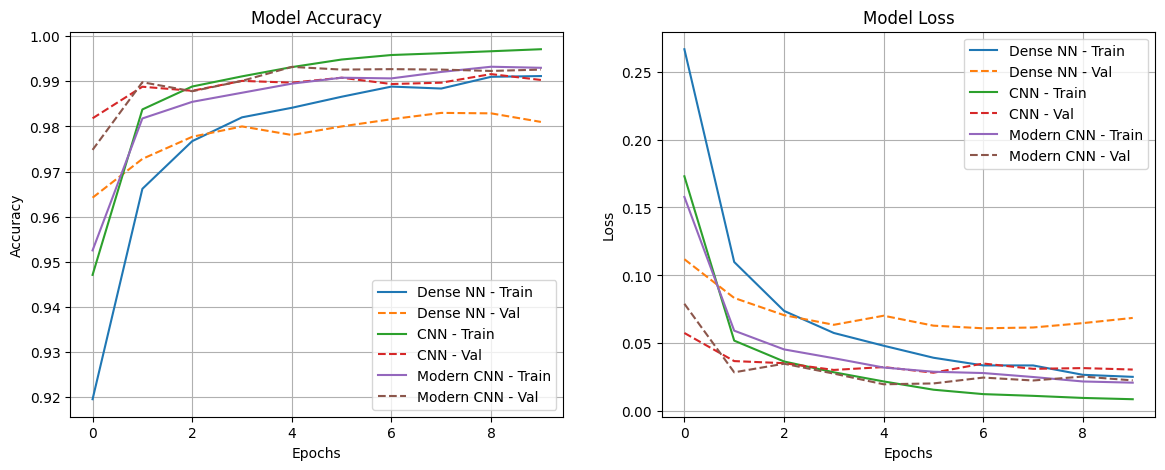

In [ ]:
import matplotlib.pyplot as plt

# Create subplots: One for accuracy, one for loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loop through each model
for name, model in models.items():
    history = model.history.history  # Get training history

    # Plot training & validation accuracy
    axes[0].plot(history['accuracy'], label=f'{name} - Train')
    axes[0].plot(history['val_accuracy'], linestyle='dashed', label=f'{name} - Val')

    # Plot training & validation loss
    axes[1].plot(history['loss'], label=f'{name} - Train')
    axes[1].plot(history['val_loss'], linestyle='dashed', label=f'{name} - Val')

# Configure Accuracy Plot
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid()

# Configure Loss Plot
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid()

# Show the plots
plt.show()

## **Support Vector Machine & Random Forest**

### SVM & RF Imports

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### SVM & RF Data Loading

In [ ]:
trainX_ml = trainX.reshape((trainX.shape[0], 784)).astype('float32') / 255.0
testX_ml = testX.reshape((testX.shape[0], 784)).astype('float32') / 255.0

### SVM & RF Train

In [ ]:
def train_traditional_ml(X_train, y_train, X_test, y_test):
    """Train and evaluate traditional ML models"""
    results = {}
    times = {}

    # Train SVM on subset
    print("Training SVM...")
    subset_size = 10000
    start_time = time.time()
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_train[:subset_size], y_train[:subset_size])
    svm_score = svm.score(X_test, y_test)
    times['SVM'] = time.time() - start_time
    results['SVM'] = svm_score

    # Train Random Forest
    print("Training Random Forest...")
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    times['Random Forest'] = time.time() - start_time
    results['Random Forest'] = rf_score
    return results, times

# Train traditional ML models
ml_results, ml_times = train_traditional_ml(
    trainX_ml, trainY,
    testX_ml, testY
)
results.update(ml_results)
training_times.update(ml_times)

Training SVM...
Training Random Forest...


### SVM & RF Visualization

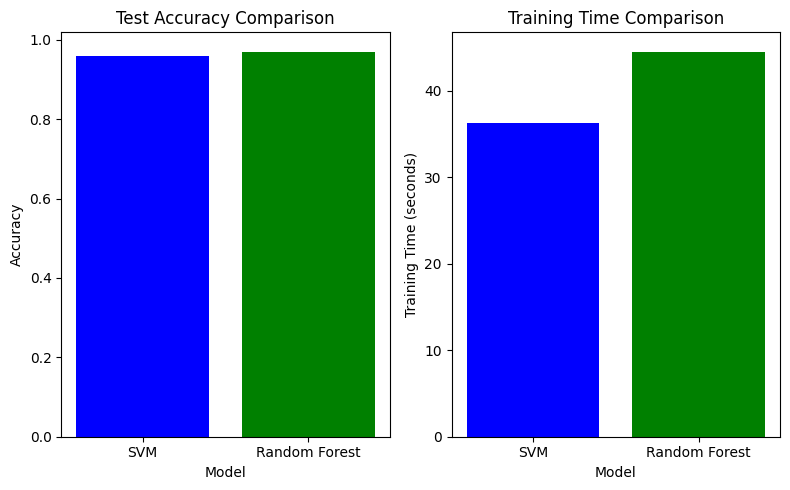

In [ ]:
# Extract results from the traditional ML models
models = ['SVM', 'Random Forest']
scores = [ml_results['SVM'], ml_results['Random Forest']]
times = [ml_times['SVM'], ml_times['Random Forest']]

# Plotting Accuracy Comparison
plt.figure(figsize=(8, 5))

# Bar plot for accuracy
plt.subplot(1, 2, 1)
plt.bar(models, scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Comparison')

# Bar plot for training time
plt.subplot(1, 2, 2)
plt.bar(models, times, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')

# Show the plots
plt.tight_layout()
plt.show()

## **VGG16**

### VGG16 Imports

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.utils import to_categorical

### VGG16 Data Loading

In [13]:
# Convert to RGB by repeating the channel 3 times
trainX_vgg = np.repeat(trainX[..., np.newaxis], 3, -1)
testX_vgg = np.repeat(testX[..., np.newaxis], 3, -1)

# Resize images to 224x224 (VGG16's expected input size)
trainX_vgg = tf.image.resize(trainX_vgg, (64, 64)).numpy()
testX_vgg = tf.image.resize(testX_vgg, (64, 64)).numpy()

# Preprocess for VGG16
trainX_vgg = preprocess_input(trainX_vgg)
testX_vgg = preprocess_input(testX_vgg)

# Convert labels to categorical
trainY_vgg = to_categorical(trainY, 10)
testY_vgg = to_categorical(testY, 10)


### VGG16 Network

In [14]:
def create_vgg16_model(fine_tune_layers):

    # Load VGG16 without top layers
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(64, 64, 3)
    )

    # Freeze the base model layers
    base_model.trainable = False

    # If fine-tuning, unfreeze the last N layers
    if fine_tune_layers:
        for layer in base_model.layers[-3:]:
            layer.trainable = True

    # Create the model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    return model

### VGG16 Train

In [15]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=10, fine_tuning=False):

    if fine_tuning:
        # Use a lower learning rate for fine-tuning
        optimizer = Adam(learning_rate=1e-5)
    else:
        # Use a higher learning rate for transfer learning
        optimizer = Adam(learning_rate=1e-4)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        x_train, y_train,
        batch_size=32,
        epochs=epochs,
        validation_data=(x_test, y_test),
        verbose=1
    )

    return history

VGG16 Transfer Learning

In [16]:
model_transfer = create_vgg16_model(fine_tune_layers=False)
history_transfer = train_model(
  model_transfer, trainX_vgg, trainY_vgg, testX_vgg, testY_vgg,
  epochs=10, fine_tuning=False
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 25ms/step - accuracy: 0.5920 - loss: 2.6734 - val_accuracy: 0.9272 - val_loss: 0.2411
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 22ms/step - accuracy: 0.8864 - loss: 0.3709 - val_accuracy: 0.9490 - val_loss: 0.1710
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9198 - loss: 0.2568 - val_accuracy: 0.9580 - val_loss: 0.1412
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9377 - loss: 0.1964 - val_accuracy: 0.9631 - val_loss: 0.1247
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9465 - loss: 0.1719 - val_accuracy: 0.9654 - val_loss: 0.1155
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 22ms/step - accuracy: 0.9539 - loss: 0.1449 - val_accuracy: 0.9667 - val_loss: 0.1099
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 24ms/step - accuracy: 0.9581 - loss: 0.1326 - val_accuracy: 0.9701 - val_loss: 0.1027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9620 -

VGG16 Fine-Tuning

In [ ]:
gc.collect()
model_transfer = create_vgg16_model(fine_tune_layers=True)
history_fine_tune = train_model(
  model_transfer, trainX_vgg, trainY_vgg, testX_vgg, testY_vgg,
  epochs=10, fine_tuning=True
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 38ms/step - accuracy: 0.6827 - loss: 1.4534 - val_accuracy: 0.9820 - val_loss: 0.0629
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 37ms/step - accuracy: 0.9715 - loss: 0.0962 - val_accuracy: 0.9861 - val_loss: 0.0429
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.9832 - loss: 0.0547 - val_accuracy: 0.9882 - val_loss: 0.0387
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9873 - loss: 0.0427 - val_accuracy: 0.9905 - val_loss: 0.0294
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.9914 - loss: 0.0302 - val_accuracy: 0.9910 - val_loss: 0.0303
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9916 - loss: 0.0280 - val_accuracy: 0.9889 - val_loss: 0.0370
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.9926 - loss: 0.0235 - val_accuracy: 0.9900 - val_loss: 0.0323
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.9944 -

### VGG16 Visualization

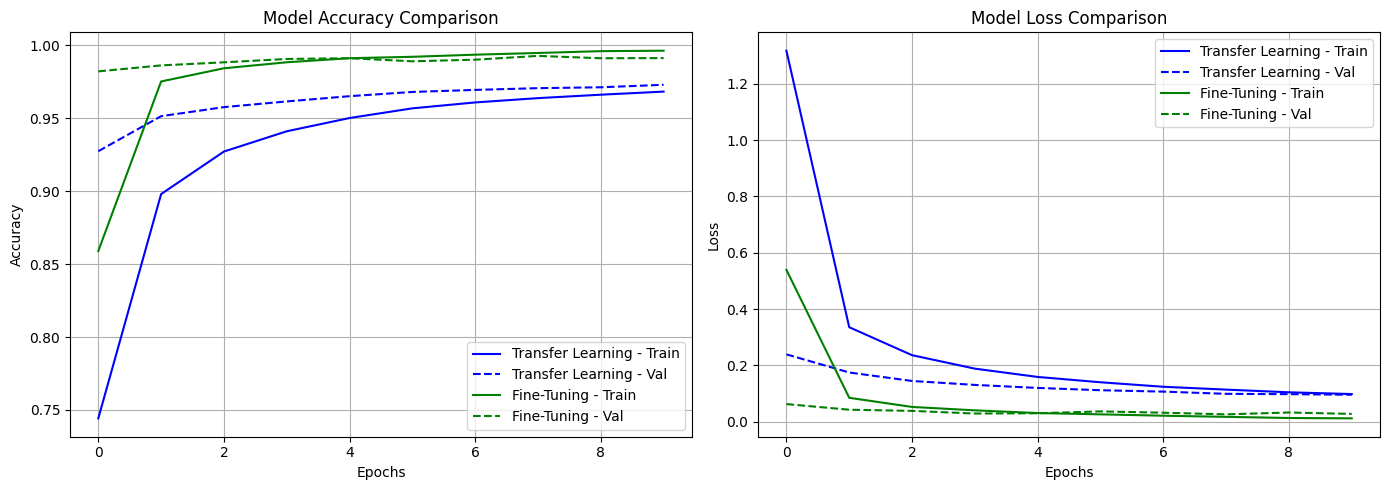

In [ ]:
# Plot Accuracy Comparison
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Transfer Learning - Train', color='blue')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning - Val', color='blue', linestyle='dashed')
plt.plot(history_fine_tune.history['accuracy'], label='Fine-Tuning - Train', color='green')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-Tuning - Val', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Transfer Learning - Train', color='blue')
plt.plot(history_transfer.history['val_loss'], label='Transfer Learning - Val', color='blue', linestyle='dashed')
plt.plot(history_fine_tune.history['loss'], label='Fine-Tuning - Train', color='green')
plt.plot(history_fine_tune.history['val_loss'], label='Fine-Tuning - Val', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Comparison')
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()


## **Vision Transformer**

### ViT Imports

In [ ]:
from transformers import AutoFeatureExtractor, TFViTForImageClassification

### ViT Data Loading

In [ ]:
trainX_vit = np.repeat(trainX[:2000, ..., np.newaxis], 3, -1)  # Convert grayscale to RGB
testX_vit = np.repeat(testX[:400, ..., np.newaxis], 3, -1)

trainX_vit = tf.image.resize(trainX_vit, (224, 224)).numpy()  # Resize to 64x64 for DeiT
testX_vit = tf.image.resize(testX_vit, (224, 224)).numpy()

trainX_vit = trainX_vit.astype(np.uint8)  # Convert to uint8 (DeiT expects this format)
testX_vit = testX_vit.astype(np.uint8)

trainY_vit = trainY[:2000]
testY_vit = testY[:400]

### ViT Network

In [ ]:
gc.collect()
def train_vit(X_train, y_train, X_test, y_test):
    gc.collect()
    start_time = time.time()

    # Create feature extractor and prepare inputs
    feature_extractor = AutoFeatureExtractor.from_pretrained('facebook/deit-tiny-patch16-224')
    train_features = feature_extractor(images=X_train, return_tensors="tf",padding=True)
    test_features = feature_extractor(images=X_test, return_tensors="tf",padding=True)

    # Create and compile model
    model = TFViTForImageClassification.from_pretrained('facebook/deit-tiny-patch16-224')

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    # Train model
    history = model.fit(
        train_features.pixel_values,
        y_train,
        batch_size=16,
        epochs=10,
        validation_data=(test_features.pixel_values, y_test),
        verbose=1
    )
    training_time = time.time() - start_time
    return history, training_time

### ViT Train

In [ ]:
history, training_time = train_vit(
    trainX_vit, trainY_vit,
    testX_vit, testY_vit
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `ViTFeatureExtractor.preprocess` and were ignored: 'padding'
  return self.prepr

Epoch 1/10
125/125 [==============================] - 60s 123ms/step - loss: 2.3813 - accuracy: 0.1735 - val_loss: 1.9415 - val_accuracy: 0.3075
Epoch 2/10
125/125 [==============================] - 13s 103ms/step - loss: 1.6046 - accuracy: 0.4200 - val_loss: 1.4645 - val_accuracy: 0.4825
Epoch 3/10
125/125 [==============================] - 13s 104ms/step - loss: 1.1402 - accuracy: 0.5930 - val_loss: 0.9318 - val_accuracy: 0.6850
Epoch 4/10
125/125 [==============================] - 13s 102ms/step - loss: 0.8586 - accuracy: 0.7135 - val_loss: 0.9430 - val_accuracy: 0.6675
Epoch 5/10
125/125 [==============================] - 13s 101ms/step - loss: 0.6088 - accuracy: 0.8035 - val_loss: 0.5362 - val_accuracy: 0.8100
Epoch 6/10
125/125 [==============================] - 13s 102ms/step - loss: 0.4968 - accuracy: 0.8490 - val_loss: 0.4499 - val_accuracy: 0.8700
Epoch 7/10
125/125 [==============================] - 13s 103ms/step - loss: 0.4010 - accuracy: 0.8800 - val_loss: 0.4352 - val_ac

### ViT Visualization

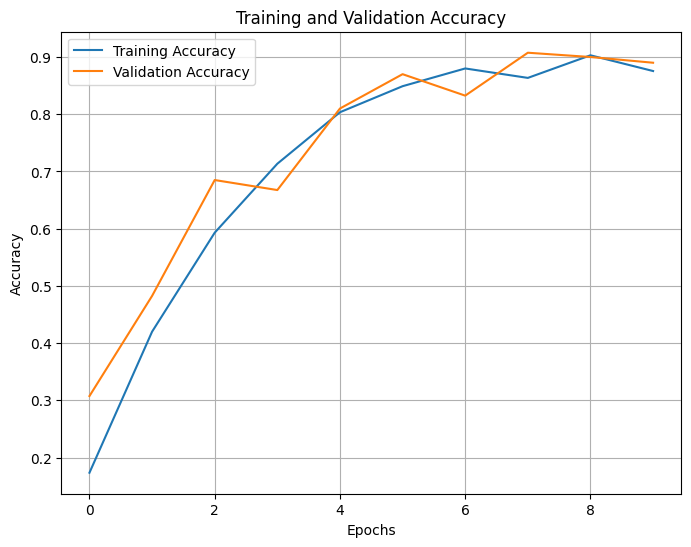

In [ ]:
# Plot training history
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"\nFinal Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

## **ResNet18**

### RestNet18 Imports

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

### ResNet18 Data Loading

In [4]:
# Reshape and convert to 3 channels (RGB)
trainX_resnet = np.repeat(trainX[..., np.newaxis], 3, -1)
testX_resnet = np.repeat(testX[..., np.newaxis], 3, -1)

# Resize to 32x32 (smaller than standard ResNet input but works for MNIST)
trainX_resnet = tf.image.resize(trainX_resnet, (64, 64)).numpy()
testX_resnet = tf.image.resize(testX_resnet, (64, 64)).numpy()

#Preprocessing
trainX_resnet = preprocess_input(trainX_resnet)
testX_resnet = preprocess_input(testX_resnet)


### ResNet18 Network

In [5]:
def create_resnet18_model(fine_tune_layers):

    # Create base model
    base_model = ResNet50V2(
        include_top=False,
        weights='imagenet',
        input_shape=(64, 64, 3),  # Using smaller input size for MNIST
        pooling='avg'
    )
    # Freeze the base model layers
    base_model.trainable = False

    # If fine-tuning, unfreeze the last N layers
    if fine_tune_layers:
        for layer in base_model.layers[-3:]:
            layer.trainable = True

    # Create the model
    model = Sequential([
        # Input layer to handle resizing and channel repetition
        Input(shape=(64, 64, 3)),
        base_model,
        Dense(1024, use_bias=False),  # Larger first Dense layer
        BatchNormalization(),  # Add BatchNorm
        Activation('relu'),
        Dropout(0.5),
        Dense(512, use_bias=False),  # Add intermediate layer
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    return model

### ResNet18 Train

In [8]:
def train_resnet18(model, X_train, y_train, X_test, y_test, epochs=10, fine_tuning=False):
    start_time = time.time()
    if fine_tuning:
        # Use a lower learning rate for fine-tuning
        optimizer = Adam(learning_rate=1e-5)
    else:
        # Use a higher learning rate for transfer learning
        optimizer = Adam(learning_rate=1e-4)

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    # Train model
    history = model.fit(
        X_train, y_train,
        batch_size=32,
        epochs=epochs,
        validation_data=(X_test, y_test),
        verbose=1
    )
    training_time = time.time() - start_time
    return history, training_time

ResNet18 Transfer Learning

In [9]:
model_transfer = create_resnet18_model(fine_tune_layers=False)
history_transfer, training_time = train_resnet18(
  model_transfer, trainX_resnet, trainY, testX_resnet, testY,
  epochs=10, fine_tuning=False
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.7518 - loss: 0.7810 - val_accuracy: 0.8948 - val_loss: 0.3278
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8914 - loss: 0.3393 - val_accuracy: 0.9007 - val_loss: 0.2976
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9082 - loss: 0.2871 - val_accuracy: 0.9000 - val_loss: 0.3074
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9162 - loss: 0.2570 - val_accuracy: 0.9421 - val_loss: 0.1787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9242 - loss: 0.2381 - val_accuracy: 0.9086 - val_loss: 0.2837
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9307 - loss: 0.2170 - val_accuracy: 0.9465 - val_loss: 0.1749
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9341 - loss: 0.2047 - val_accuracy: 0.9217 - val_loss: 0.2488
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9374 -

ResNet18 Fine-Tuning

In [10]:
gc.collect()
model_transfer = create_resnet18_model(fine_tune_layers=True)
history_fine_tune, training_time = train_resnet18(
  model_transfer, trainX_resnet, trainY, testX_resnet, testY,
  epochs=10, fine_tuning=True
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - accuracy: 0.4851 - loss: 1.5825 - val_accuracy: 0.8471 - val_loss: 0.5036
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 16ms/step - accuracy: 0.7890 - loss: 0.6651 - val_accuracy: 0.8907 - val_loss: 0.3560
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8378 - loss: 0.5158 - val_accuracy: 0.9110 - val_loss: 0.2949
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8618 - loss: 0.4361 - val_accuracy: 0.9201 - val_loss: 0.2531
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8780 - loss: 0.3890 - val_accuracy: 0.9297 - val_loss: 0.2265
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8910 - loss: 0.3500 - val_accuracy: 0.9351 - val_loss: 0.2084
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8970 - loss: 0.3249 - val_accuracy: 0.9403 - val_loss: 0.1918
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9059 -

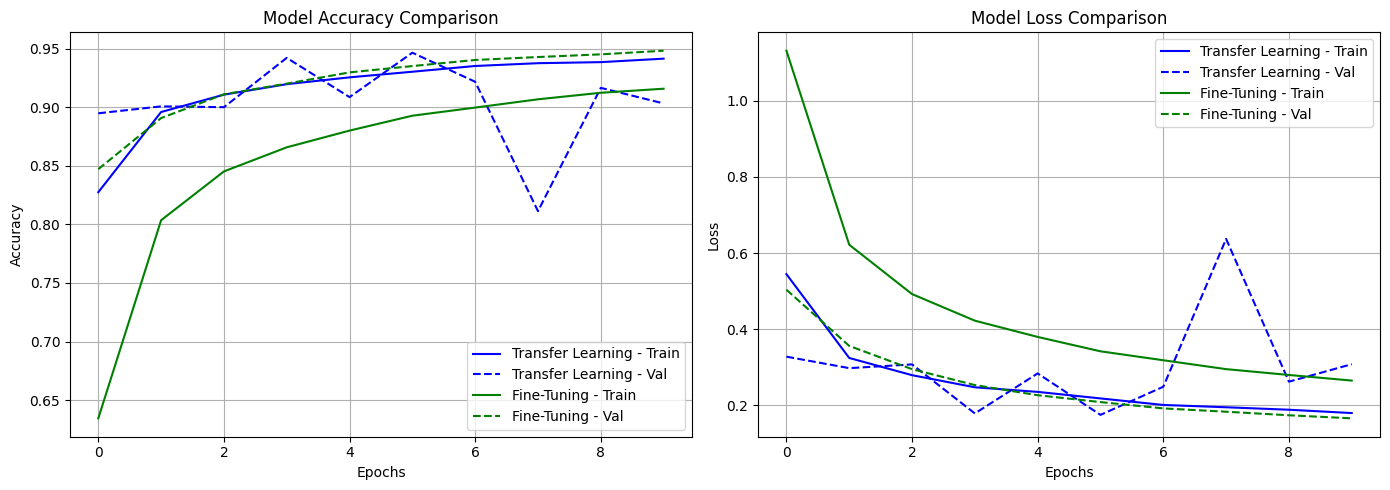

In [11]:
# Plot Accuracy Comparison
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Transfer Learning - Train', color='blue')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning - Val', color='blue', linestyle='dashed')
plt.plot(history_fine_tune.history['accuracy'], label='Fine-Tuning - Train', color='green')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-Tuning - Val', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Transfer Learning - Train', color='blue')
plt.plot(history_transfer.history['val_loss'], label='Transfer Learning - Val', color='blue', linestyle='dashed')
plt.plot(history_fine_tune.history['loss'], label='Fine-Tuning - Train', color='green')
plt.plot(history_fine_tune.history['val_loss'], label='Fine-Tuning - Val', color='green', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Comparison')
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()
